#KNN for Regression – Implementation Guidelines

# 1. Import data set

In [3]:
import pandas as pd

In [4]:
path = "https://raw.githubusercontent.com/ovibaridar/Data_sets/main/weight-height.csv"

In [5]:
data = pd.read_csv(path)

In [6]:
data.tail()

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


In [7]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Separate X (Gender, Height) and Y (y=Weight).

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
 skla = LabelEncoder()

In [10]:
data['Gender'] = skla.fit_transform(data['Gender'])

In [11]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
from sklearn.model_selection import train_test_split

In [30]:
x = data[['Gender', 'Height']]
y= data['Weight']

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=1)

# 4. Apply Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [33]:
lg = LinearRegression()

In [34]:
lg.fit(xtrain, ytrain)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [36]:
y_prd=lg.predict(xtest)

In [37]:
y_prd

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [38]:
score = r2_score(ytest, y_prd)

In [39]:
score 

0.9059959607091159

In [40]:
lg.predict([[2,60]])

array([152.26684046])

In [41]:
mse=mean_squared_error(ytest, y_prd)
mae = mean_absolute_error(ytest, y_prd)

In [42]:
mse,mae

(99.67250998070043, 7.982132592729135)

In [43]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted Value')

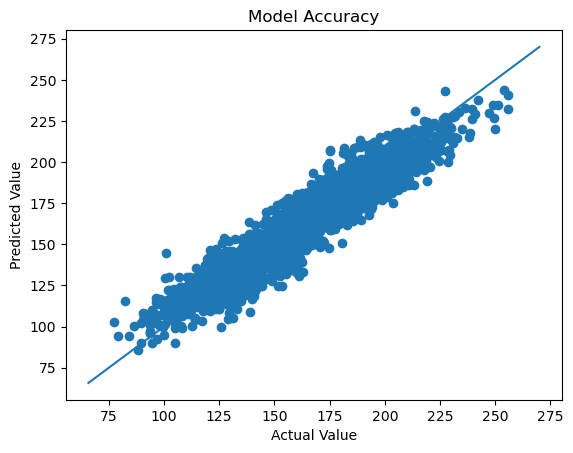

In [50]:
plt.scatter(ytest, y_prd)
plt.plot([y.min(),y.max()], [y.min(),y.max()])
plt.title('Model Accuracy')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# 6. Apply KNN Regressor: Scikit-Learn Link

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knr=KNeighborsRegressor(5)

In [56]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [57]:
kn_ypred = knr.predict(xtest)

In [73]:
knn_mse=mean_squared_error(ytest,kn_ypred)
knn_mae=mean_absolute_error(ytest,kn_ypred)

In [74]:
knn_mse ,knn_mea

(123.15365863436983, 8.850747809837165)

In [75]:
knn_r2 =r2_score(ytest,kn_ypred)

In [76]:
knn_r2 

0.8838502073708883

# Compare KNN & Linear Regression with the KNN Model and Linear regression as well.

In [77]:
compare_score = abs(knn_r2-score)
compare_mse = abs(mse-knn_mse)
compare_mae = abs(mae-knn_mea)

In [78]:
compare_score,compare_mse,compare_mae

(0.02214575333822766, 23.481148653669408, 0.8686152171080295)